<a href="https://colab.research.google.com/github/abhigarg05/XAUUSD/blob/main/xauusd_colab_AI_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 AI-Powered XAUUSD Strategy Backtester
## Professional Gold Trading Strategy Analysis with AI Assistance

### Features:
- **AI Strategy Generator**: Use Colab AI to create strategies from descriptions
- **Manual Mode**: Write and test your custom strategies
- **Auto Mode**: AI discovers and tests multiple strategies automatically
- **Professional Reports**: Comprehensive PDF reports with all visualizations
- **Complete Analysis**: Equity curves, drawdowns, heatmaps, and comparisons

---

## 🤖 AI STRATEGY GENERATOR (Optional)

Use this section to generate strategy code using AI. Describe what you want and let AI write the code for you!

In [3]:
#@title AI Strategy Generator { run: "auto", display-mode: "form" }
#@markdown ### 🧠 Describe Your Strategy
#@markdown Tell the AI what kind of trading strategy you want, and it will generate the code for you.

strategy_description = "Buy when RSI is oversold below 30 and MACD crosses above signal line. Sell when RSI is overbought above 70 or MACD crosses below signal." #@param {type:"string"}

#@markdown ↓ Click this button after entering your description to generate strategy code
generate_strategy = False #@param {type:"boolean"}

#@markdown ---
#@markdown **Available Indicators:**
#@markdown - Price: `Close`, `Open`, `High`, `Low`, `Volume`
#@markdown - Moving Averages: `SMA_10`, `SMA_20`, `SMA_50`, `SMA_100`, `SMA_200`, `EMA_12`, `EMA_26`
#@markdown - Momentum: `RSI_14`, `RSI_9`, `RSI_25`, `MACD`, `MACD_Signal`, `MACD_Hist`, `ROC`, `Stoch_K`, `Stoch_D`
#@markdown - Volatility: `BB_Upper`, `BB_Middle`, `BB_Lower`, `ATR`
#@markdown - Volume: `Volume_SMA`

if generate_strategy and strategy_description:
    print("🤖 Generating strategy code...\n")

    try:
        from google.colab import ai

        prompt = f"""
Generate a Python trading strategy function based on this description:
{strategy_description}

Available indicators: Close, Open, High, Low, Volume, SMA_20, SMA_50, SMA_200, EMA_12, EMA_26,
RSI, MACD, MACD_Signal, MACD_Hist, BB_Upper, BB_Middle, BB_Lower, ATR, Stoch_K, Stoch_D,
Volume_SMA, ROC

Requirements:
1. Function must be named: def my_strategy(row):
2. Return: 1 for BUY, -1 for SELL, 0 for HOLD
3. Include a clear docstring explaining the logic
4. Access indicators using row['indicator_name']
5. Use proper conditions and logic

Return ONLY the Python function code, no explanations or markdown.
"""

        response = ai.generate_text(
            prompt,
            model_name='google/gemini-2.5-flash'
        )

        # Clean the response
        code = response.strip()
        if '```python' in code:
            code = code.split('```python')[1].split('```')[0].strip()
        elif '```' in code:
            code = code.split('```')[1].split('```')[0].strip()

        print("✅ Generated Strategy Code:\n")
        print("="*80)
        print(code)
        print("="*80)
        print("\n📝 Copy this code to the 'Manual Strategy Definition' section below!")

    except Exception as e:
        print(f"❌ Error generating strategy: {e}")
        print("Make sure you're running this in Google Colab")
elif generate_strategy:
    print("⚠️ Please enter a strategy description first")
else:
    print("💡 Enter your strategy description above and check the 'generate_strategy' box to get AI-generated code")

💡 Enter your strategy description above and check the 'generate_strategy' box to get AI-generated code


## ⚙️ BACKTEST CONFIGURATION

Configure all your backtest parameters here using the form below.

In [1]:
#@title Backtest Parameters { run: "auto", display-mode: "form" }
#@markdown ### 🎯 Basic Configuration

#@markdown ↓ Choose between Manual (test your own strategy) or Auto (AI discovers strategies)
MODE = "Auto" #@param ["Manual", "Auto"]

#@markdown ↓ How many years of historical data to download
YEARS = 20 #@param {type:"slider", min:1, max:20, step:1}

#@markdown ↓ Starting capital in USD
INITIAL_CAPITAL = 10000 #@param {type:"number"}

#@markdown ---
#@markdown ### 📊 Position Management

#@markdown ↓ What percentage of capital to use per trade (0.95 = 95%)
POSITION_SIZE = 0.95 #@param {type:"slider", min:0.1, max:1.0, step:0.05}

#@markdown ↓ Transaction cost per trade (0.001 = 0.1%)
TRANSACTION_COST = 0.001 #@param {type:"number"}

#@markdown ↓ Stop loss percentage (0.05 = 5% max loss per trade)
STOP_LOSS = 0.05 #@param {type:"slider", min:0.01, max:0.20, step:0.01}

#@markdown ---
#@markdown ### 🤖 AI Configuration (for Auto mode only)

#@markdown ↓ How many strategies to generate and test in Auto mode
NUM_STRATEGIES = 10 #@param {type:"slider", min:1, max:10, step:1}

print("✅ Configuration saved!\n")
print("Current Settings:")
print(f"  Mode: {MODE}")
print(f"  Data Period: {YEARS} years")
print(f"  Initial Capital: ${INITIAL_CAPITAL:,}")
print(f"  Position Size: {POSITION_SIZE*100:.0f}%")
print(f"  Transaction Cost: {TRANSACTION_COST*100:.2f}%")
print(f"  Stop Loss: {STOP_LOSS*100:.0f}%")
if MODE == "Auto":
    print(f"  AI Strategies: {NUM_STRATEGIES}")

✅ Configuration saved!

Current Settings:
  Mode: Auto
  Data Period: 20 years
  Initial Capital: $10,000
  Position Size: 95%
  Transaction Cost: 0.10%
  Stop Loss: 5%
  AI Strategies: 10


## ✍️ MANUAL STRATEGY DEFINITION

### For Manual Mode: Define your trading strategy here

**Instructions:**
- Function must be named `my_strategy(row)`
- Return `1` for BUY signal
- Return `-1` for SELL signal  
- Return `0` for HOLD (no action)

**Available Indicators:**
Access any indicator using `row['indicator_name']`, for example:
- `row['Close']` - Current close price
- `row['RSI']` - RSI value
- `row['MACD']` - MACD value
- And all others listed in the AI generator section

In [2]:
# ✍️ DEFINE YOUR STRATEGY HERE (or paste AI-generated code)

def my_strategy(row):
    """Golden Cross + Filters + Volume/Vol/Trend"""

    # BUY: Golden Cross + Strong trend + Vol breakout
    if (row['SMA_50'] > row['SMA_200'] and
        row['RSI'] < 70 and
        row['MACD'] > row['MACD_Signal'] and
        row['ADX'] > 25 and
        row['Volume'] > row['Volume_SMA'] * 1.2 and
        row['STOCH_K'] < 50):  # Momentum room
        return 1

    # SELL: Death Cross + Overbought + Vol confirmation
    elif (row['SMA_50'] < row['SMA_200'] and
          row['RSI'] > 70 and
          row['MACD'] < row['MACD_Signal']):
        return -1

    return 0

print("✅ Manual strategy defined!")
print(f"\n📝 Strategy Description:")
print(my_strategy.__doc__)

✅ Manual strategy defined!

📝 Strategy Description:
Golden Cross + Filters + Volume/Vol/Trend


## 📦 INSTALLATION & SETUP

In [3]:
#@title Install Required Packages { display-mode: "form" }
#@markdown This cell installs all necessary packages. You don't need to modify anything here.

!pip install -q yfinance matplotlib seaborn plotly pandas numpy kaleido pandas_ta

import subprocess
import sys
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import warnings
from matplotlib.backends.backend_pdf import PdfPages
import inspect

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

print("✅ All packages installed and imported successfully!")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 15.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 3.0.0 which is incompatible.
bqplot 0.12.45 requires

## 📥 DATA DOWNLOAD & PREPARATION

In [9]:
#@title Download Gold Data & Calculate Indicators { display-mode: "form" }
#@markdown This downloads XAUUSD data and calculates all technical indicators.

def download_gold_data(years=5):
    """Download XAUUSD historical data"""
    print(f"📊 Downloading {years} years of gold data...")

    end_date = datetime.now()
    start_date = end_date - timedelta(days=years*365)

    df = yf.download('GC=F', start=start_date, end=end_date, progress=False)

    if df.empty:
        raise ValueError("Failed to download data")

    # Flatten MultiIndex columns if they exist
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)

    print(f"✅ Downloaded {len(df)} trading days")
    print(f"📅 Range: {df.index[0].date()} to {df.index[-1].date()}")

    return df

def calculate_indicators(df):
    """Calculate comprehensive technical indicators"""
    print("📊 Calculating technical indicators...")

    df = df.copy()

    # Moving Averages
    for l in [10,20,50,100,200]:
      df.ta.sma(length=l, append=True)
      print(f"SMA_{l} = {df[f'SMA_{l}'].iloc[-1]:.4f}")

    for l in [12,26]:
      df[F'EMA_{l}'] = ta.ema(df['Close'], length=l)
      print(f"EMA_{l} = {df[F'EMA_{l}'].iloc[-1]:.4f}")

    # RSI
    for length, suffix in [(14, '_14'), (9, '_9'), (25, '_25')]:
        df.ta.rsi(length=length, append=True)
        col = f'RSI{suffix}'
        print(f"{col} = {df[col].iloc[-1]:.4f}")

    df['RSI'] = df['RSI_14']
    print(f"RSI = {df['RSI'].iloc[-1]:.4f}")

    # MACD
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']

    # MACD
    macd = ta.macd(df['Close'], fast=12, slow=26, signal=9)
    df['MACD'] = macd['MACD_12_26_9']
    df['MACD_signal'] = macd['MACDs_12_26_9']
    df['MACD_hist'] = macd['MACDh_12_26_9']
    # Safe prints (latest non-NaN or N/A)
    for col in ['MACD', 'MACD_signal', 'MACD_hist']:
      val = df[col].dropna()
      print(f"{col} = {val.iat[-1]:.4f}")

    # Bollinger Bands
    bbands = ta.bbands(df['Close'], length=20, std=2)
    if bbands is not None:
        bb_cols = bbands.columns.tolist()
        df['BB_Lower'] = bbands[bb_cols[0]]
        df['BB_Middle'] = bbands[bb_cols[1]]
        df['BB_Upper'] = bbands[bb_cols[2]]
        for col in ['BB_Lower', 'BB_Middle', 'BB_Upper']:
            val = df[col].dropna()
            print(f"{col} = {val.iat[-1]:.4f}")

    df['BB_Width'] = ((df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle']) * 100
    print(f"BB Width = {df['BB_Width'].iat[-1]:.2f}%")
    if df['BB_Width'].iat[-1] < 4:
        print("🔥 SQUEEZE - Trade breakout!")

    # ATR
    df['ATR'] = ta.atr(df['High'], df['Low'], df['Close'], length=14)
    print(f"ATR = {df['ATR'].iat[-1]:.4f}")

    # Stochastic Oscillator
    stoch = ta.stoch(df['High'], df['Low'], df['Close'], k=14, d=3, smooth_k=3)
    df['STOCH_K'] = stoch['STOCHk_14_3_3']
    df['STOCH_D'] = stoch['STOCHd_14_3_3']
    for col in ['STOCH_K', 'STOCH_D']:
      val = df[col].dropna()
      print(f"{col} = {val.iat[-1]:.4f}")

    # ADX
    adx_cols = df.ta.adx(length=14, append=True)
    df['ADX'] = adx_cols['ADX_14']    # Main ADX
    df['ADXp'] = adx_cols['DMP_14']   # +DM
    df['ADXn'] = adx_cols['DMN_14']   # -DM
    for col in ['ADX', 'ADXp', 'ADXn']:
      val = df[col].dropna()
      print(f"{col} = {val.iat[-1]:.4f}")

    # CCI
    df['CCI'] = ta.cci(df['High'], df['Low'], df['Close'], length=14)
    print(f"CCI = {df['CCI'].iat[-1]:.2f}")

    # OBV
    df['OBV'] = ta.obv(df['Close'], df['Volume'])
    print(f"OBV = {df['OBV'].iat[-1]:,.0f}")

    # Returns
    df['Returns'] = df['Close'].pct_change()
    df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Volatility_20'] = df['Returns'].rolling(20).std() * np.sqrt(252)
    for col in ['Returns', 'Log_Returns', 'Volatility_20']:
        val = df[col].dropna()
        print(f"{col} = {val.iat[-1]:.4f}")

    # Price momentum
    df['ROC'] = ta.roc(df['Close'], length=12)
    print(f"ROC = {df['ROC'].iat[-1]:.2f}%")

    # Volume
    df['Volume_SMA'] = ta.sma(df['Volume'], length=20)
    print(f"Volume_SMA = {df['Volume_SMA'].iat[-1]:,.0f}")

    # VWAP (Volume Weighted Avg Price)
    df['VWAP'] = ta.vwap(df['High'], df['Low'], df['Close'], df['Volume'])
    print(f"VWAP = {df['VWAP'].iat[-1]:.2f}")

    # Williams %R (overbought/oversold)
    df['WillR'] = ta.willr(df['High'], df['Low'], df['Close'], length=14)
    print(f"WillR = {df['WillR'].iat[-1]:.2f}")

    # CMF (Chaikin Money Flow)
    df['CMF'] = ta.cmf(df['High'], df['Low'], df['Close'], df['Volume'], length=20)
    print(f"CMF = {df['CMF'].iat[-1]:.2f}")

    # MFI (Money Flow Index)
    df['MFI'] = ta.mfi(df['High'], df['Low'], df['Close'], df['Volume'], length=14)
    print(f"MFI = {df['MFI'].iat[-1]:.2f}")

    # Stochastic RSI
    stochrsi = ta.stochrsi(df['Close'], length=14)
    df['StochRSI_K'] = stochrsi['STOCHRSIk_14_14_3_3']
    df['StochRSI_D'] = stochrsi['STOCHRSId_14_14_3_3']
    for col in ['StochRSI_K', 'StochRSI_D']:
      val = df[col].dropna()
      print(f"{col} = {val.iat[-1]:.4f}")

    # HMA (Hull Moving Average - low lag)
    df['HMA_20'] = ta.hma(df['Close'], length=20)
    print(f"HMA_20 = {df['HMA_20'].iat[-1]:.2f}")

    # VWMA (Volume Weighted MA)
    df['VWMA_20'] = ta.vwma(df['Close'], df['Volume'], length=20)
    print(f"VWMA_20 = {df['VWMA_20'].iat[-1]:.2f}")

    # SuperTrend returns 3 cols: SUPERT, SUPERTd, SUPERTl, SUPERTs
    supertrend = ta.supertrend(df['High'], df['Low'], df['Close'], length=10)
    df['SuperTrend'] = supertrend.iloc[:, 0]  # Main trend line
    df['SuperTrend_Dir'] = supertrend.iloc[:, 1]  # Direction (+1/-1)

    print(f"SuperTrend = {df['SuperTrend'].iat[-1]:.2f}")
    print(f"SuperTrend_Dir = {df['SuperTrend_Dir'].iat[-1]}")  # 1=bull, -1=bear

    print("MACD Bull:", df['MACD'].iat[-1] > df['MACD_signal'].iat[-1])


    # Keltner Channels (ATR bands)
    kc = ta.kc(df['High'], df['Low'], df['Close'], length=20)
    df['KC_Upper'] = kc['KCUe_20_2']
    df['KC_Lower'] = kc['KCLe_20_2']
    df['KC_Basis'] = kc['KCBe_20_2']
    for col in ['KC_Upper', 'KC_Lower','KC_Basis']:
      val = df[col].dropna()
      print(f"{col} = {val.iat[-1]:.4f}")

    # Ichimoku Cloud (current + forward)
    ichi_current, ichi_forward = ta.ichimoku(df['High'], df['Low'], df['Close'])
    df['Ichimoku_A'] = ichi_current['ISA_9']       # Senkou Span A
    df['Ichimoku_B'] = ichi_current['ISB_26']      # Senkou Span B
    df['Ichimoku_Base'] = ichi_current['IKS_26']   # Kijun-sen (Base Line)
    df['Ichimoku_Leading'] = ichi_current['ITS_9'] # Tenkan-sen (Leading Line)
    df['Chikou'] = ichi_current['ICS_26']          # Chikou Span (bonus)
    for col in ['Ichimoku_A', 'Ichimoku_B', 'Ichimoku_Base', 'Ichimoku_Leading', 'Chikou']:
        val = df[col].dropna()
        print(f"{col} = {val.iat[-1]:.4f}")

    # Parabolic SAR (Trailing stop)
    df['PSAR'] = ta.psar(df['High'], df['Low'], df['Close'])['PSARl_0.02_0.2']
    print(f"PSAR = {df['PSAR'].iat[-1]:.2f}")

    # Ultimate Oscillator
    df['UO'] = ta.uo(df['High'], df['Low'], df['Close'])
    print(f"UO = {df['UO'].iat[-1]:.2f}")

    # Aroon (Trend newness)
    aroon = ta.aroon(df['High'], df['Low'], length=25)
    df['Aroon_Up'] = aroon['AROONU_25']
    df['Aroon_Down'] = aroon['AROOND_25']
    df['Aroon_Oscillator'] = aroon['AROONOSC_25']
    for col in ['Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator']:
      val = df[col].dropna()
      print(f"{col} = {val.iat[-1]:.4f}")

    # Force Index (Volume × Price)
    df['Force_Index'] = ta.efi(df['Close'], df['Volume'], length=13)
    print(f"Force_Index = {df['Force_Index'].iat[-1]:.2f}")

    # Safe extraction (handles DataFrame/Series)
    def safe_assign(df, col, func, *args):
        result = func(*args)
        if isinstance(result, pd.DataFrame):
            df[col] = result.iloc[:,-1]  # Last column
        else:
            df[col] = result
        return df

    # OLD: Just counts
    safe_assign(df, 'Doji', ta.cdl_doji, df['Open'], df['High'], df['Low'], df['Close'])
    print("Doji:", df['Doji'].sum())  # Useless for strategy

    # NEW: Store ALL 20+ common patterns for strategy signals
    candle_patterns = [
        'cdl_doji', 'cdl_hammer', 'cdl_engulfing', 'cdl_morningstar',
        'cdl_eveningstar', 'cdl_shootingstar', 'cdl_hangingman',
        'cdl_inside', 'cdl_outside', 'cdl_z', 'cdl_3starsinsouth'
    ]

    for pattern in candle_patterns:
        result = getattr(ta, pattern)(df['Open'], df['High'], df['Low'], df['Close'])
        df[f'C_{pattern.upper()}'] = result  # e.g., C_CDL_DOJI

    # Quick stats + latest
    print("🕯️ Latest candle signals:")
    latest = df[['Close']].copy()
    for pat in candle_patterns:
        col = f'C_{pat.upper()}'
        latest[col] = df[col]
    print(latest.tail(3))  # Last 3 days patterns

    # Strategy-ready: df['Bullish_Candle'] = (df.filter(like='CDL_', axis=1) > 50).any(axis=1)



    df = df.dropna()

    print(f"✅ Calculated {len([c for c in df.columns if c not in ['Open', 'High', 'Low', 'Close', 'Volume']])} indicators")

    return df

# Download and prepare data
print("📥 Downloading data for {YEARS} Years")
df = download_gold_data(YEARS)
df_indicators = calculate_indicators(df)

df.ta.indicators(as_list=True)

# Check if my_strategy exists AND is callable
if 'my_strategy' in globals() and callable(my_strategy):
  df_indicators['Signal'] = df_indicators.apply(my_strategy, axis=1)
  print(df_indicators['Signal'].value_counts())

print(f"\n✅ Data ready! Shape: {df_indicators.shape}")
print(f"📊 Latest price: ${float(df_indicators['Close'].iloc[-1]):.2f}")

📥 Downloading data for {YEARS} Years
📊 Downloading 20 years of gold data...
✅ Downloaded 5027 trading days
📅 Range: 2006-02-06 to 2026-01-30
📊 Calculating technical indicators...
SMA_10 = 5000.3700
SMA_20 = 4753.1300
SMA_50 = 4455.8540
SMA_100 = 4198.5530
SMA_200 = 3773.5390
EMA_12 = 4982.5252
EMA_26 = 4755.3280
RSI_14 = 72.9848
RSI_9 = 71.5678
RSI_25 = 71.8105
RSI = 72.9848
MACD = 227.1971
MACD_signal = 177.1829
MACD_hist = 50.0142
BB_Lower = 4135.9560
BB_Middle = 4753.1300
BB_Upper = 5370.3040
BB Width = 25.97%
ATR = 140.0765
STOCH_K = 77.8696
STOCH_D = 89.1746
ADX = 48.6791
ADXp = 48.0122
ADXn = 11.2496
CCI = 3808.19
OBV = -976,465
Returns = -0.0299
Log_Returns = -0.0304
Volatility_20 = 0.2703
ROC = 12.42%
Volume_SMA = 21,791
VWAP = 5200.73
WillR = -42.33
CMF = -0.12
MFI = 53.77
StochRSI_K = 78.5962
StochRSI_D = 92.8654
HMA_20 = 5245.73
VWMA_20 = 5217.79
SuperTrend = 5039.34
SuperTrend_Dir = 1.0
MACD Bull: True
KC_Upper = 5160.9650
KC_Lower = 4511.9804
KC_Basis = 4836.4727
Ichimoku_

AttributeError: module 'pandas_ta' has no attribute 'cdl_hammer'

In [17]:
df = download_gold_data(5)

# Get ALL ta methods
ta_methods = [m for m in dir(df.ta) if not m.startswith('_') and m not in ['adjusted', 'constants', 'cores', 'datetime_ordered', 'reverse']]
print(f"🔍 Found {len(ta_methods)} methods")

# Track what worked
successful = []
failed = []
original_cols = set(df.columns)

for method in ta_methods:
    try:
        func = getattr(df.ta, method)

        # Try with default parameters
        try:
            func(append=True)
            new_cols = [c for c in df.columns if c not in original_cols]
            if new_cols:
                successful.append(method)
                print(f"✅ {method} → {len(new_cols)} cols")
            else:
                # Try common parameter combinations
                tried = False
                for params in [
                    {'length': 14},
                    {'fast': 12, 'slow': 26},
                    {'timeperiod': 14},
                ]:
                    try:
                        func(append=True, **params)
                        new_cols = [c for c in df.columns if c not in original_cols]
                        if new_cols:
                            successful.append(method)
                            print(f"✅ {method}({params}) → {len(new_cols)} cols")
                            tried = True
                            break
                    except:
                        continue

                if not tried:
                    failed.append((method, "No output"))

        except TypeError as e:
            if 'positional argument' in str(e) or 'required' in str(e):
                # Needs specific params - skip
                failed.append((method, "Needs params"))
            else:
                failed.append((method, str(e)[:50]))

    except Exception as e:
        failed.append((method, str(e)[:50]))

# Summary
total_indicators = df.shape[1] - 6  # Subtract OHLCV
print(f"\n{'='*60}")
print(f"🎉 SUCCESS: {len(successful)}/{len(ta_methods)} methods")
print(f"📊 TOTAL INDICATORS: {total_indicators}")
print(f"❌ FAILED: {len(failed)}")
print(f"{'='*60}")

# Show sample of new columns
new_cols = [c for c in df.columns if c not in ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj_Close']]
print(f"\n📋 Sample indicators ({len(new_cols)} total):")
print(new_cols[:20])

# Show failures if you want to debug
if failed:
    print(f"\n⚠️  Failed methods (first 10):")
    for method, reason in failed[:10]:
        print(f"   {method}: {reason}")

📊 Downloading 5 years of gold data...
✅ Downloaded 1258 trading days
📅 Range: 2021-02-01 to 2026-01-30
🔍 Found 164 methods
✅ aberration → 4 cols
✅ accbands → 7 cols
✅ ad → 8 cols
✅ adosc → 9 cols
✅ adx → 13 cols
✅ alligator → 16 cols
✅ alma → 17 cols
✅ alphatrend → 19 cols
✅ amat → 21 cols
✅ ao → 22 cols
✅ aobv → 29 cols
✅ apo → 30 cols
✅ aroon → 33 cols
✅ atr → 34 cols
✅ atrts → 35 cols
✅ bbands → 40 cols
✅ bias → 41 cols
✅ bop → 42 cols
✅ brar → 44 cols
✅ cci → 45 cols
[i] Requires TA-Lib to use 2crows. (pip install TA-Lib)
[i] Requires TA-Lib to use 3blackcrows. (pip install TA-Lib)
[i] Requires TA-Lib to use 3inside. (pip install TA-Lib)
[i] Requires TA-Lib to use 3linestrike. (pip install TA-Lib)
[i] Requires TA-Lib to use 3outside. (pip install TA-Lib)
[i] Requires TA-Lib to use 3starsinsouth. (pip install TA-Lib)
[i] Requires TA-Lib to use 3whitesoldiers. (pip install TA-Lib)
[i] Requires TA-Lib to use abandonedbaby. (pip install TA-Lib)
[i] Requires TA-Lib to use advanceblock. 

## 🔧 BACKTESTING ENGINE

In [5]:
#@title Backtesting Engine { display-mode: "form" }
#@markdown Core backtesting logic. No need to modify this.

class Backtester:
    def __init__(self, data, strategy_func, initial_capital=10000,
                 position_size=0.95, transaction_cost=0.001, stop_loss=0.05):
        self.data = data.copy()
        self.strategy = strategy_func
        self.initial_capital = initial_capital
        self.position_size = position_size
        self.transaction_cost = transaction_cost
        self.stop_loss = stop_loss

        self.cash = initial_capital
        self.position = 0
        self.entry_price = 0

        self.equity_curve = []
        self.trades = []

    def run(self):
        """Execute backtest"""
        for idx, row in self.data.iterrows():
            current_price = row['Close']
            signal = self.strategy(row)

            # Check stop loss
            if self.position > 0 and self.entry_price > 0:
                loss_pct = (current_price - self.entry_price) / self.entry_price
                if loss_pct < -self.stop_loss:
                    self.cash = self.position * current_price * (1 - self.transaction_cost)
                    self.trades.append({
                        'Date': idx,
                        'Type': 'SELL (STOP LOSS)',
                        'Price': current_price,
                        'Quantity': self.position,
                        'Value': self.cash
                    })
                    self.position = 0
                    self.entry_price = 0

            # Execute signals
            if signal == 1 and self.position == 0:  # BUY
                invest_amount = self.cash * self.position_size
                self.position = (invest_amount * (1 - self.transaction_cost)) / current_price
                self.entry_price = current_price
                self.cash = self.cash * (1 - self.position_size)

                self.trades.append({
                    'Date': idx,
                    'Type': 'BUY',
                    'Price': current_price,
                    'Quantity': self.position,
                    'Value': invest_amount
                })

            elif signal == -1 and self.position > 0:  # SELL
                self.cash += self.position * current_price * (1 - self.transaction_cost)

                self.trades.append({
                    'Date': idx,
                    'Type': 'SELL',
                    'Price': current_price,
                    'Quantity': self.position,
                    'Value': self.cash
                })

                self.position = 0
                self.entry_price = 0

            # Calculate equity
            total_equity = self.cash + (self.position * current_price if self.position > 0 else 0)
            self.equity_curve.append({
                'Date': idx,
                'Equity': total_equity,
                'Cash': self.cash,
                'Position_Value': self.position * current_price if self.position > 0 else 0
            })

        return self.compile_results()

    def compile_results(self):
        """Compile backtest results"""
        equity_df = pd.DataFrame(self.equity_curve).set_index('Date')
        trades_df = pd.DataFrame(self.trades)

        final_equity = equity_df['Equity'].iloc[-1]
        total_return = ((final_equity - self.initial_capital) / self.initial_capital) * 100

        equity_df['Returns'] = equity_df['Equity'].pct_change()

        sharpe_ratio = (equity_df['Returns'].mean() / equity_df['Returns'].std()) * np.sqrt(252) if equity_df['Returns'].std() > 0 else 0

        cummax = equity_df['Equity'].cummax()
        drawdown = (equity_df['Equity'] - cummax) / cummax
        max_drawdown = drawdown.min() * 100

        # Trade statistics
        if len(trades_df) > 0:
            buy_trades = trades_df[trades_df['Type'] == 'BUY'].reset_index(drop=True)
            sell_trades = trades_df[trades_df['Type'].str.contains('SELL')].reset_index(drop=True)

            total_trades = min(len(buy_trades), len(sell_trades))

            if total_trades > 0:
                profits = []
                for i in range(total_trades):
                    profit = ((sell_trades.iloc[i]['Price'] - buy_trades.iloc[i]['Price']) /
                             buy_trades.iloc[i]['Price']) * 100
                    profits.append(profit)

                win_rate = (sum(1 for p in profits if p > 0) / len(profits)) * 100
                avg_win = np.mean([p for p in profits if p > 0]) if any(p > 0 for p in profits) else 0
                avg_loss = np.mean([p for p in profits if p < 0]) if any(p < 0 for p in profits) else 0
            else:
                total_trades = 0
                win_rate = 0
                avg_win = 0
                avg_loss = 0
        else:
            total_trades = 0
            win_rate = 0
            avg_win = 0
            avg_loss = 0

        metrics = {
            'initial_capital': self.initial_capital,
            'final_equity': final_equity,
            'total_return': total_return,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown': max_drawdown,
            'total_trades': total_trades,
            'win_rate': win_rate,
            'avg_win': avg_win,
            'avg_loss': avg_loss,
            'profit_factor': abs(avg_win / avg_loss) if avg_loss != 0 else 0
        }

        return {
            'equity_curve': equity_df,
            'trades': trades_df,
            'metrics': metrics
        }

print("✅ Backtesting engine ready!")

✅ Backtesting engine ready!


## 🚀 RUN BACKTEST

This will execute either Manual or Auto mode based on your configuration.

In [16]:
#@title Execute Backtest { display-mode: "form" }
#@markdown Click "Run" to start the backtest

def generate_strategies_with_ai(num_strategies, data_sample):
    """Generate multiple strategies using Colab AI"""
    from google.colab import ai

    strategies = []

    strategy_types = [
        "trend following with moving average crossovers",
        "mean reversion using Bollinger Bands",
        "momentum-based using RSI and MACD",
        "volatility breakout using ATR",
        "multi-indicator confirmation system",
        "stochastic oscillator with trend filter",
        "price action with volume confirmation",
        "adaptive strategy using multiple timeframes"
    ]

    for i in range(num_strategies):
        strategy_type = strategy_types[i % len(strategy_types)]

        prompt = f"""
Create a unique gold (XAUUSD) trading strategy #{i+1} focusing on {strategy_type}.

Available indicators: Close, SMA_20, SMA_50, SMA_200, EMA_12, EMA_26, RSI, MACD,
MACD_Signal, MACD_Hist, BB_Upper, BB_Middle, BB_Lower, ATR, Stoch_K, Stoch_D,
Volume_SMA, ROC

Requirements:
1. Function must be named 'strategy_{i+1}(row)'
2. Return: 1 for BUY, -1 for SELL, 0 for HOLD
3. Include clear logic and conditions
4. Include a docstring explaining the strategy

Return ONLY executable Python code, no explanations or markdown.
"""

        print(f"🤖 Generating strategy {i+1}/{num_strategies}: {strategy_type}...")

        try:
            response = ai.generate_text(
                prompt,
                model_name='google/gemini-2.5-flash'
            )

            code = response.strip()
            if '```python' in code:
                code = code.split('```python')[1].split('```')[0].strip()
            elif '```' in code:
                code = code.split('```')[1].split('```')[0].strip()

            strategies.append({
                'name': f'Strategy_{i+1}_{strategy_type.replace(" ", "_")}',
                'code': code,
                'type': strategy_type
            })

        except Exception as e:
            print(f"⚠️ Error generating strategy {i+1}: {e}")

    return strategies

# Main execution
if MODE == 'Manual':
    print("📊 MANUAL MODE - Running backtest with your strategy\n" + "="*60)

    backtester = Backtester(
        df_indicators,
        my_strategy,
        initial_capital=INITIAL_CAPITAL,
        position_size=POSITION_SIZE,
        transaction_cost=TRANSACTION_COST,
        stop_loss=STOP_LOSS
    )

    print("🔄 Running backtest...")
    results = backtester.run()
    all_results = {'Manual_Strategy': {'results': results, 'code': my_strategy}}
    best_name = 'Manual_Strategy'
    best_results = results

    print("✅ Backtest complete!")

else:  # Auto Mode
    print("🤖 AUTO MODE - AI Strategy Discovery\n" + "="*60)

    try:
        strategies = generate_strategies_with_ai(NUM_STRATEGIES, df_indicators.head(100))

        print(f"\n✅ Generated {len(strategies)} strategies\n")

        all_results = {}

        for strat_info in strategies:
            print(f"\n🔄 Testing {strat_info['name']}...")

            try:
                exec(strat_info['code'], globals())

                func_name = [line for line in strat_info['code'].split('\n')
                            if line.strip().startswith('def ')][0]
                func_name = func_name.split('def ')[1].split('(')[0]
                strategy_func = globals()[func_name]

                backtester = Backtester(
                    df_indicators,
                    strategy_func,
                    initial_capital=INITIAL_CAPITAL,
                    position_size=POSITION_SIZE,
                    transaction_cost=TRANSACTION_COST,
                    stop_loss=STOP_LOSS
                )

                results = backtester.run()
                all_results[strat_info['name']] = {
                    'results': results,
                    'code': strat_info['code']
                }

                m = results['metrics']
                print(f"  Return: {m['total_return']:.2f}% | Sharpe: {m['sharpe_ratio']:.2f} | "
                      f"Trades: {m['total_trades']} | Win Rate: {m['win_rate']:.2f}%")

            except Exception as e:
                print(f"  ❌ Error: {e}")

        if all_results:
            best_name = max(all_results.keys(),
                          key=lambda x: all_results[x]['results']['metrics']['total_return'])
            best_results = all_results[best_name]['results']

            print(f"\n\n🏆 BEST STRATEGY: {best_name}")
            print(f"   Total Return: {best_results['metrics']['total_return']:.2f}%")
        else:
            print("\n❌ No successful strategies generated")
            best_name = None
            best_results = None

    except Exception as e:
        print(f"❌ Error in Auto mode: {e}")
        print("Make sure you're running this in Google Colab")
        best_results = None

🤖 AUTO MODE - AI Strategy Discovery
🤖 Generating strategy 1/10: trend following with moving average crossovers...
🤖 Generating strategy 2/10: mean reversion using Bollinger Bands...
🤖 Generating strategy 3/10: momentum-based using RSI and MACD...
🤖 Generating strategy 4/10: volatility breakout using ATR...
🤖 Generating strategy 5/10: multi-indicator confirmation system...
🤖 Generating strategy 6/10: stochastic oscillator with trend filter...
🤖 Generating strategy 7/10: price action with volume confirmation...
🤖 Generating strategy 8/10: adaptive strategy using multiple timeframes...
🤖 Generating strategy 9/10: trend following with moving average crossovers...
🤖 Generating strategy 10/10: mean reversion using Bollinger Bands...

✅ Generated 10 strategies


🔄 Testing Strategy_1_trend_following_with_moving_average_crossovers...
  Return: 234.16% | Sharpe: 0.53 | Trades: 11 | Win Rate: 27.27%

🔄 Testing Strategy_2_mean_reversion_using_Bollinger_Bands...
  Return: 0.00% | Sharpe: 0.00 | Tra

## 📊 RESULTS SUMMARY

In [17]:
if best_results:
    print("\n" + "="*60)
    print("📊 BACKTEST RESULTS SUMMARY")
    print("="*60)

    metrics = best_results['metrics']
    equity_df = best_results['equity_curve']

    print(f"\n💰 FINANCIAL PERFORMANCE")
    print(f"   Initial Capital:        ${metrics['initial_capital']:,.2f}")
    print(f"   Final Equity:           ${metrics['final_equity']:,.2f}")
    print(f"   Total Return:           {metrics['total_return']:.2f}%")
    print(f"   Max Drawdown:           {metrics['max_drawdown']:.2f}%")

    print(f"\n📈 RISK METRICS")
    print(f"   Sharpe Ratio:           {metrics['sharpe_ratio']:.2f}")
    print(f"   Volatility (Daily):     {equity_df['Returns'].std()*100:.2f}%")
    print(f"   Volatility (Annual):    {equity_df['Returns'].std()*np.sqrt(252)*100:.2f}%")

    print(f"\n🎯 TRADE STATISTICS")
    print(f"   Total Trades:           {metrics['total_trades']}")
    print(f"   Win Rate:               {metrics['win_rate']:.2f}%")
    print(f"   Average Win:            {metrics['avg_win']:.2f}%")
    print(f"   Average Loss:           {metrics['avg_loss']:.2f}%")
    print(f"   Profit Factor:          {metrics['profit_factor']:.2f}")

    # Buy & Hold comparison
    initial_price = df_indicators['Close'].iloc[0]
    final_price = df_indicators['Close'].iloc[-1]
    buy_hold_return = ((final_price - initial_price) / initial_price) * 100

    print(f"\n📊 COMPARISON")
    print(f"   Strategy Return:        {metrics['total_return']:.2f}%")
    print(f"   Buy & Hold Return:      {buy_hold_return:.2f}%")
    print(f"   Outperformance:         {metrics['total_return'] - buy_hold_return:.2f}%")

    print("\n" + "="*60)
else:
    print("❌ No results to display")


📊 BACKTEST RESULTS SUMMARY

💰 FINANCIAL PERFORMANCE
   Initial Capital:        $10,000.00
   Final Equity:           $35,842.31
   Total Return:           258.42%
   Max Drawdown:           -39.07%

📈 RISK METRICS
   Sharpe Ratio:           0.56
   Volatility (Daily):     0.85%
   Volatility (Annual):    13.46%

🎯 TRADE STATISTICS
   Total Trades:           8
   Win Rate:               37.50%
   Average Win:            36.44%
   Average Loss:           -5.15%
   Profit Factor:          7.08

📊 COMPARISON
   Strategy Return:        258.42%
   Buy & Hold Return:      781.26%
   Outperformance:         -522.83%



## 📈 VISUALIZATION 1: Portfolio Performance Overview

In [18]:
if best_results:
    fig = make_subplots(
        rows=3, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.05,
        row_heights=[0.5, 0.3, 0.2],
        subplot_titles=('Portfolio Equity', 'Gold Price (XAUUSD)', 'Drawdown')
    )

    equity_df = best_results['equity_curve']

    # Equity curve
    fig.add_trace(
        go.Scatter(x=equity_df.index, y=equity_df['Equity'],
                   name='Portfolio Value', line=dict(color='green', width=2)),
        row=1, col=1
    )

    # Add buy and sell markers
    if len(best_results['trades']) > 0:
        trades_df = best_results['trades']
        buys = trades_df[trades_df['Type'] == 'BUY']
        sells = trades_df[trades_df['Type'].str.contains('SELL')]

        buy_equity = [equity_df.loc[equity_df.index >= date, 'Equity'].iloc[0]
                      for date in buys['Date'] if date in equity_df.index or any(equity_df.index >= date)]
        sell_equity = [equity_df.loc[equity_df.index >= date, 'Equity'].iloc[0]
                       for date in sells['Date'] if date in equity_df.index or any(equity_df.index >= date)]

        if len(buy_equity) > 0:
            fig.add_trace(
                go.Scatter(x=buys['Date'], y=buy_equity, mode='markers',
                          name='Buy', marker=dict(color='lime', size=10, symbol='triangle-up')),
                row=1, col=1
            )

        if len(sell_equity) > 0:
            fig.add_trace(
                go.Scatter(x=sells['Date'], y=sell_equity, mode='markers',
                          name='Sell', marker=dict(color='red', size=10, symbol='triangle-down')),
                row=1, col=1
            )

    # Gold price
    fig.add_trace(
        go.Scatter(x=df_indicators.index, y=df_indicators['Close'],
                   name='Gold Price', line=dict(color='gold', width=1)),
        row=2, col=1
    )

    # Drawdown
    cummax = equity_df['Equity'].cummax()
    drawdown = (equity_df['Equity'] - cummax) / cummax * 100

    fig.add_trace(
        go.Scatter(x=equity_df.index, y=drawdown,
                   name='Drawdown', fill='tozeroy',
                   line=dict(color='red', width=1)),
        row=3, col=1
    )

    fig.update_xaxes(title_text="Date", row=3, col=1)
    fig.update_yaxes(title_text="USD", row=1, col=1)
    fig.update_yaxes(title_text="USD/oz", row=2, col=1)
    fig.update_yaxes(title_text="%", row=3, col=1)

    fig.update_layout(height=900, title_text="Backtest Performance Overview", showlegend=True)
    fig.show()
else:
    print("❌ No results to visualize")

## 📊 VISUALIZATION 2: Monthly Returns Heatmap

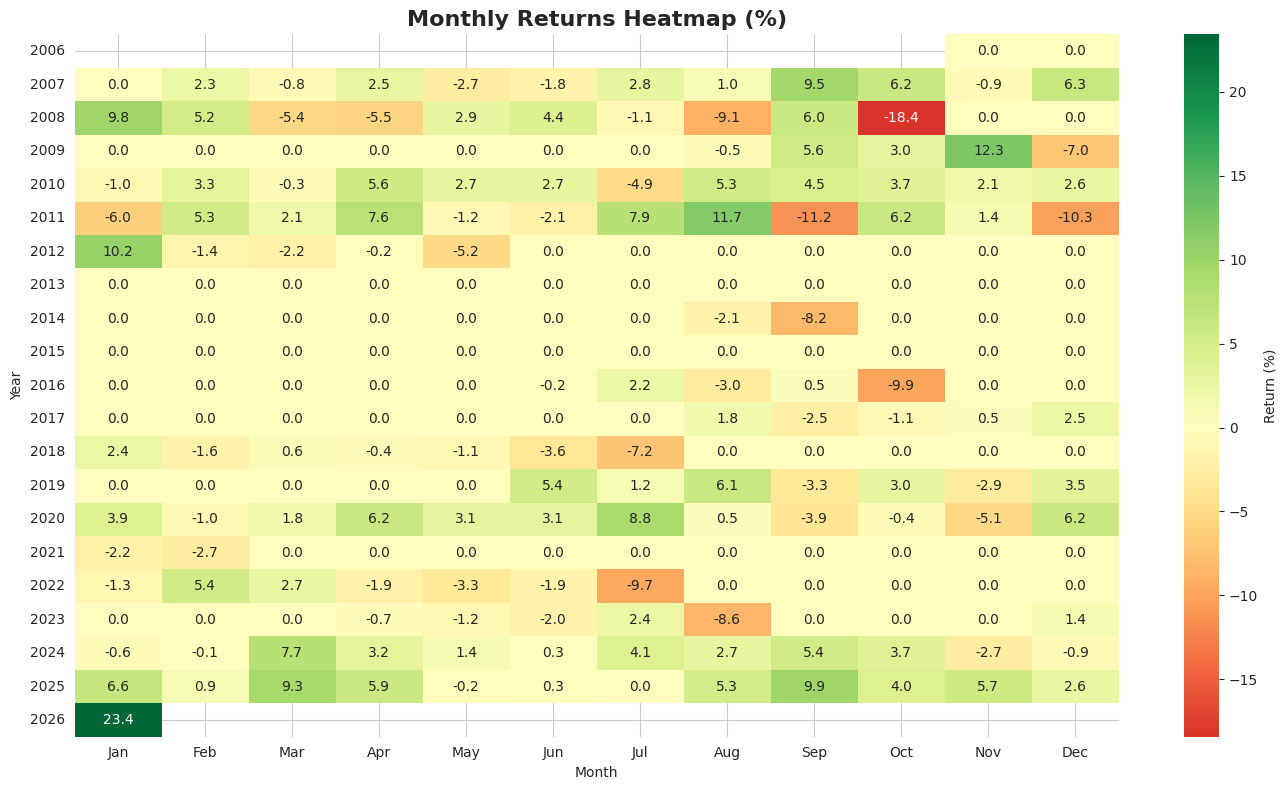

In [19]:
if best_results:
    equity_df_copy = equity_df.copy()
    equity_df_copy['Returns_pct'] = equity_df_copy['Equity'].pct_change() * 100
    equity_df_copy['Year'] = equity_df_copy.index.year
    equity_df_copy['Month'] = equity_df_copy.index.month

    years = sorted(equity_df_copy['Year'].unique())
    months = range(1, 13)

    returns_matrix = []
    for year in years:
        year_returns = []
        for month in months:
            month_data = equity_df_copy[(equity_df_copy['Year'] == year) & (equity_df_copy['Month'] == month)]
            if len(month_data) > 0:
                year_returns.append(month_data['Returns_pct'].sum())
            else:
                year_returns.append(np.nan)
        returns_matrix.append(year_returns)

    monthly_returns = pd.DataFrame(returns_matrix, index=years, columns=range(1, 13))

    plt.figure(figsize=(14, 8))
    sns.heatmap(monthly_returns, annot=True, fmt='.1f', cmap='RdYlGn',
                center=0, cbar_kws={'label': 'Return (%)'},
                xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.title('Monthly Returns Heatmap (%)', fontsize=16, fontweight='bold')
    plt.ylabel('Year')
    plt.xlabel('Month')
    plt.tight_layout()
    plt.show()
else:
    print("❌ No results to visualize")

## 📊 VISUALIZATION 3: Trade Analysis

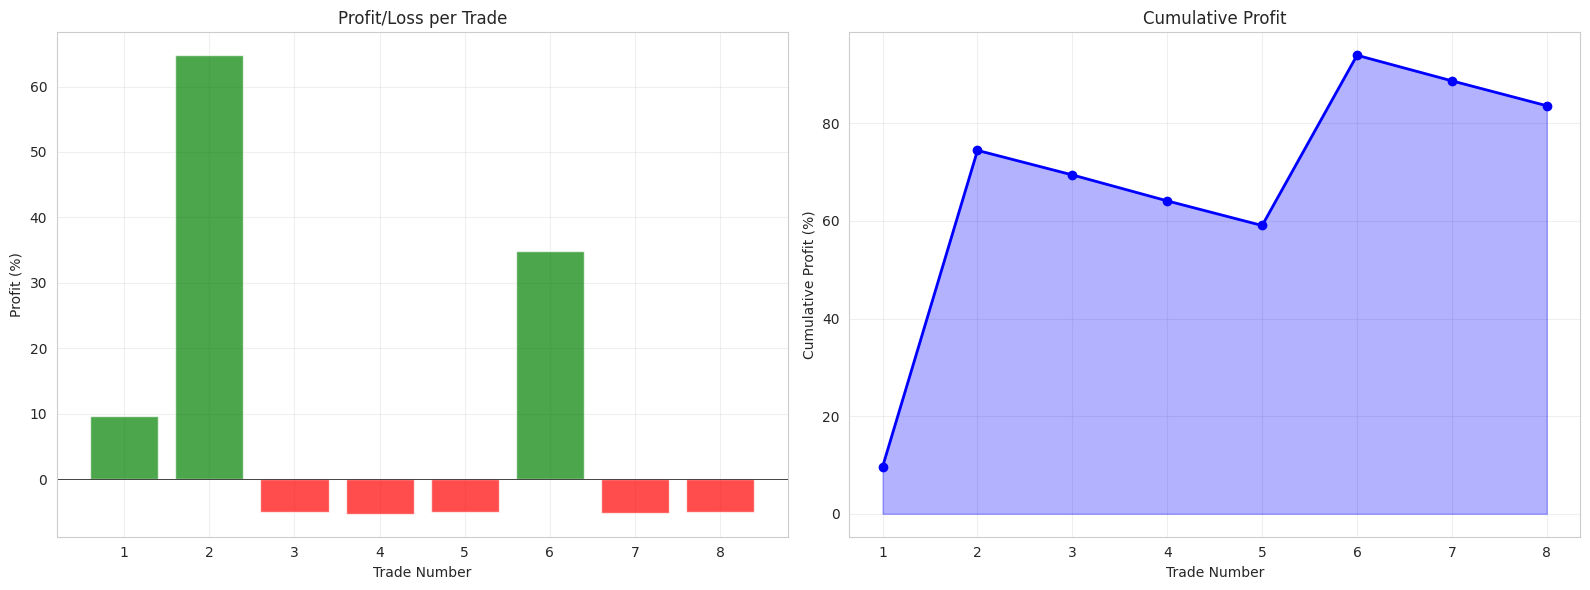


🏆 Top 5 Best Trades:
   Trade   Buy_Date  Sell_Date  Profit_PCT
1      2 2009-08-03 2012-05-22   64.781527
5      6 2019-06-12 2021-02-24   34.874990
0      1 2007-02-06 2008-10-31    9.669525
2      3 2014-08-13 2014-09-09   -5.027422
4      5 2017-08-21 2018-07-17   -5.043391

💀 Top 5 Worst Trades:
   Trade   Buy_Date  Sell_Date  Profit_PCT
3      4 2016-06-24 2016-10-06   -5.318178
6      7 2022-01-11 2022-07-12   -5.240291
7      8 2023-04-11 2023-08-15   -5.102756
4      5 2017-08-21 2018-07-17   -5.043391
2      3 2014-08-13 2014-09-09   -5.027422


In [20]:
if best_results and len(best_results['trades']) > 0:
    trades_df = best_results['trades']
    buy_trades = trades_df[trades_df['Type'] == 'BUY'].reset_index(drop=True)
    sell_trades = trades_df[trades_df['Type'].str.contains('SELL')].reset_index(drop=True)

    if len(sell_trades) > 0:
        trade_profits = []
        for i in range(min(len(buy_trades), len(sell_trades))):
            profit_pct = ((sell_trades.iloc[i]['Price'] - buy_trades.iloc[i]['Price']) /
                         buy_trades.iloc[i]['Price'] * 100)
            trade_profits.append({
                'Trade': i+1,
                'Buy_Date': buy_trades.iloc[i]['Date'],
                'Sell_Date': sell_trades.iloc[i]['Date'],
                'Buy_Price': buy_trades.iloc[i]['Price'],
                'Sell_Price': sell_trades.iloc[i]['Price'],
                'Profit_PCT': profit_pct
            })

        profit_df = pd.DataFrame(trade_profits)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

        colors = ['green' if x > 0 else 'red' for x in profit_df['Profit_PCT']]
        ax1.bar(profit_df['Trade'], profit_df['Profit_PCT'], color=colors, alpha=0.7)
        ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        ax1.set_xlabel('Trade Number')
        ax1.set_ylabel('Profit (%)')
        ax1.set_title('Profit/Loss per Trade')
        ax1.grid(True, alpha=0.3)

        profit_df['Cumulative_Profit'] = profit_df['Profit_PCT'].cumsum()
        ax2.plot(profit_df['Trade'], profit_df['Cumulative_Profit'],
                linewidth=2, color='blue', marker='o')
        ax2.fill_between(profit_df['Trade'], profit_df['Cumulative_Profit'],
                        alpha=0.3, color='blue')
        ax2.set_xlabel('Trade Number')
        ax2.set_ylabel('Cumulative Profit (%)')
        ax2.set_title('Cumulative Profit')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        print("\n🏆 Top 5 Best Trades:")
        print(profit_df.nlargest(5, 'Profit_PCT')[['Trade', 'Buy_Date', 'Sell_Date', 'Profit_PCT']])

        print("\n💀 Top 5 Worst Trades:")
        print(profit_df.nsmallest(5, 'Profit_PCT')[['Trade', 'Buy_Date', 'Sell_Date', 'Profit_PCT']])
else:
    print("No trades were executed!")

## 📊 VISUALIZATION 4: Risk Metrics Dashboard

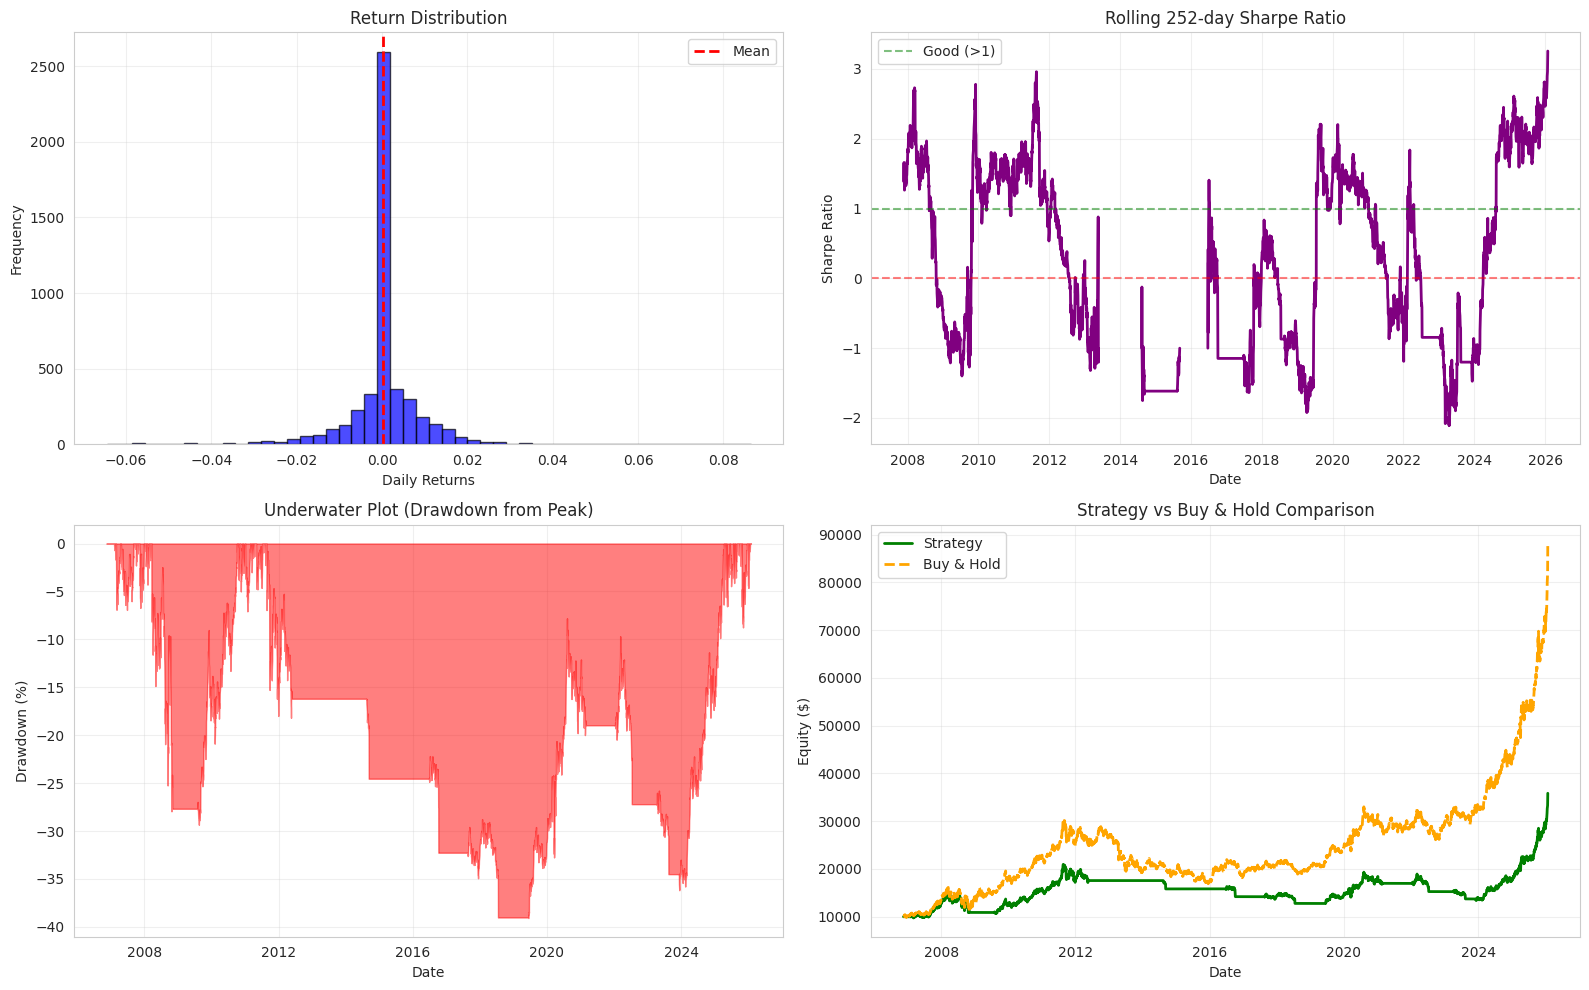

In [21]:
if best_results:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))

    # Returns distribution
    axes[0, 0].hist(equity_df['Returns'].dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
    axes[0, 0].axvline(equity_df['Returns'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    axes[0, 0].set_xlabel('Daily Returns')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Return Distribution')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Rolling Sharpe Ratio
    rolling_sharpe = (equity_df['Returns'].rolling(252).mean() /
                     equity_df['Returns'].rolling(252).std()) * np.sqrt(252)
    axes[0, 1].plot(equity_df.index, rolling_sharpe, linewidth=2, color='purple')
    axes[0, 1].axhline(y=1, color='green', linestyle='--', alpha=0.5, label='Good (>1)')
    axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Sharpe Ratio')
    axes[0, 1].set_title('Rolling 252-day Sharpe Ratio')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Underwater plot
    cummax = equity_df['Equity'].cummax()
    drawdown = (equity_df['Equity'] - cummax) / cummax * 100
    axes[1, 0].fill_between(equity_df.index, drawdown, 0, alpha=0.5, color='red')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Drawdown (%)')
    axes[1, 0].set_title('Underwater Plot (Drawdown from Peak)')
    axes[1, 0].grid(True, alpha=0.3)

    # Strategy vs Buy & Hold
    initial_price = df_indicators['Close'].iloc[0]
    buy_hold_equity = (df_indicators['Close'] / initial_price) * INITIAL_CAPITAL

    common_index = equity_df.index.intersection(buy_hold_equity.index)
    axes[1, 1].plot(common_index, equity_df.loc[common_index, 'Equity'],
                   label='Strategy', linewidth=2, color='green')
    axes[1, 1].plot(common_index, buy_hold_equity.loc[common_index],
                   label='Buy & Hold', linewidth=2, color='orange', linestyle='--')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Equity ($)')
    axes[1, 1].set_title('Strategy vs Buy & Hold Comparison')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("❌ No results to visualize")

## 📋 ALL STRATEGIES TESTED (Auto Mode Only)

In [22]:
if MODE == 'Auto' and 'all_results' in globals() and all_results:
    print("\n📋 ALL STRATEGIES TESTED:\n")
    print("="*80)

    sorted_strategies = sorted(all_results.items(),
                              key=lambda x: x[1]['results']['metrics']['total_return'],
                              reverse=True)

    for rank, (name, data) in enumerate(sorted_strategies, 1):
        m = data['results']['metrics']
        print(f"\n{rank}. {name}:")
        print(f"   Return: {m['total_return']:.2f}% | Sharpe: {m['sharpe_ratio']:.2f} | "
              f"Max DD: {m['max_drawdown']:.2f}%")
        print(f"   Trades: {m['total_trades']} | Win Rate: {m['win_rate']:.2f}% | "
              f"Profit Factor: {m['profit_factor']:.2f}")

    print("\n" + "="*80)
elif MODE == 'Manual':
    print("ℹ️ This section is only available in Auto mode")
else:
    print("❌ No strategies to display")


📋 ALL STRATEGIES TESTED:


1. Strategy_8_adaptive_strategy_using_multiple_timeframes:
   Return: 258.42% | Sharpe: 0.56 | Max DD: -39.07%
   Trades: 8 | Win Rate: 37.50% | Profit Factor: 7.08

2. Strategy_1_trend_following_with_moving_average_crossovers:
   Return: 234.16% | Sharpe: 0.53 | Max DD: -40.93%
   Trades: 11 | Win Rate: 27.27% | Profit Factor: 9.13

3. Strategy_9_trend_following_with_moving_average_crossovers:
   Return: 234.16% | Sharpe: 0.53 | Max DD: -40.93%
   Trades: 11 | Win Rate: 27.27% | Profit Factor: 9.13

4. Strategy_4_volatility_breakout_using_ATR:
   Return: 218.06% | Sharpe: 0.51 | Max DD: -43.38%
   Trades: 13 | Win Rate: 30.77% | Profit Factor: 6.50

5. Strategy_5_multi-indicator_confirmation_system:
   Return: 161.02% | Sharpe: 0.45 | Max DD: -54.48%
   Trades: 9 | Win Rate: 33.33% | Profit Factor: 5.38

6. Strategy_6_stochastic_oscillator_with_trend_filter:
   Return: 137.24% | Sharpe: 0.43 | Max DD: -52.57%
   Trades: 22 | Win Rate: 59.09% | Profit Factor

## 💾 VIEW STRATEGY CODE

In [23]:
#@title View Strategy Code { display-mode: "form" }
#@markdown Shows the code for the best strategy

if 'all_results' in globals() and all_results and best_name:
    print(f"\n📝 CODE FOR: {best_name}\n")
    print("="*80)

    if MODE == 'Auto':
        print(all_results[best_name]['code'])
    else:
        print(inspect.getsource(my_strategy))

    print("\n" + "="*80)

    m = all_results[best_name]['results']['metrics']
    print(f"\n📊 Performance:")
    print(f"   Total Return: {m['total_return']:.2f}%")
    print(f"   Sharpe Ratio: {m['sharpe_ratio']:.2f}")
    print(f"   Max Drawdown: {m['max_drawdown']:.2f}%")
    print(f"   Win Rate: {m['win_rate']:.2f}%")
else:
    print("❌ No strategy code available")


📝 CODE FOR: Strategy_8_adaptive_strategy_using_multiple_timeframes

def strategy_8(row):
    """
    Strategy 8: Adaptive Multi-Timeframe Trend-Volatility Crossover for Gold (XAUUSD).

    This strategy identifies strong trends across multiple timeframes, confirms momentum,
    and uses Bollinger Bands (BB_Middle) and Rate of Change (ROC) adaptively to signal entry
    in line with prevailing market strength or weakness.

    Adaptive components:
    1.  Multi-Timeframe Analysis: Uses SMA_200 for long-term trend, SMA_50 and EMAs for
        intermediate trend/momentum, and MACD/Stochastics for short-term entry timing.
    2.  Volatility/Strength Confirmation: Bollinger Band Middle line along with ROC
        and specific RSI thresholds (55/45) are used to confirm sustained price
        action and dynamic market conditions, rather than fixed overbought/oversold levels.

    Entry Conditions:
    BUY:
    1.  Higher Timeframe (HTF) Strong Uptrend:
        - SMA_50 is strictly above SMA

## 📄 GENERATE PDF REPORT

In [24]:
#@title Generate Comprehensive PDF Report { display-mode: "form" }
#@markdown Click run to generate a professional PDF report with all visualizations

if best_results:
    print("📄 Generating comprehensive PDF report...\n")

    pdf_filename = f'backtest_report_{best_name}_{datetime.now().strftime("%Y%m%d_%H%M%S")}.pdf'

    with PdfPages(pdf_filename) as pdf:
        # Page 1: Summary
        fig, ax = plt.subplots(figsize=(11, 8.5))
        ax.axis('off')

        summary_text = f"""
        XAUUSD BACKTEST REPORT
        {'='*60}

        Strategy: {best_name}
        Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        Mode: {MODE}

        CONFIGURATION
        {'-'*60}
        Initial Capital: ${INITIAL_CAPITAL:,.2f}
        Position Size: {POSITION_SIZE*100:.0f}%
        Transaction Cost: {TRANSACTION_COST*100:.2f}%
        Stop Loss: {STOP_LOSS*100:.1f}%
        Data Period: {YEARS} years

        PERFORMANCE SUMMARY
        {'-'*60}
        Final Equity: ${best_results['metrics']['final_equity']:,.2f}
        Total Return: {best_results['metrics']['total_return']:.2f}%
        Sharpe Ratio: {best_results['metrics']['sharpe_ratio']:.2f}
        Max Drawdown: {best_results['metrics']['max_drawdown']:.2f}%

        TRADE STATISTICS
        {'-'*60}
        Total Trades: {best_results['metrics']['total_trades']}
        Win Rate: {best_results['metrics']['win_rate']:.2f}%
        Average Win: {best_results['metrics']['avg_win']:.2f}%
        Average Loss: {best_results['metrics']['avg_loss']:.2f}%
        Profit Factor: {best_results['metrics']['profit_factor']:.2f}

        BENCHMARK COMPARISON
        {'-'*60}
        Buy & Hold Return: {buy_hold_return:.2f}%
        Outperformance: {best_results['metrics']['total_return'] - buy_hold_return:.2f}%
        """

        ax.text(0.1, 0.95, summary_text, transform=ax.transAxes,
               fontsize=10, verticalalignment='top', fontfamily='monospace')
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        # Page 2: Equity Curve
        fig, axes = plt.subplots(3, 1, figsize=(11, 8.5), sharex=True)

        axes[0].plot(equity_df.index, equity_df['Equity'], 'g-', linewidth=2)
        axes[0].set_ylabel('Equity ($)')
        axes[0].set_title('Portfolio Equity Curve')
        axes[0].grid(True, alpha=0.3)

        axes[1].plot(df_indicators.index, df_indicators['Close'], 'orange', linewidth=1.5)
        axes[1].set_ylabel('Price ($/oz)')
        axes[1].set_title('Gold Price')
        axes[1].grid(True, alpha=0.3)

        cummax = equity_df['Equity'].cummax()
        drawdown = (equity_df['Equity'] - cummax) / cummax * 100
        axes[2].fill_between(equity_df.index, drawdown, 0, alpha=0.5, color='red')
        axes[2].set_ylabel('Drawdown (%)')
        axes[2].set_xlabel('Date')
        axes[2].set_title('Drawdown from Peak')
        axes[2].grid(True, alpha=0.3)

        plt.tight_layout()
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        # Page 3: Risk Metrics
        fig, axes = plt.subplots(2, 2, figsize=(11, 8.5))

        axes[0, 0].hist(equity_df['Returns'].dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
        axes[0, 0].axvline(equity_df['Returns'].mean(), color='red', linestyle='--', linewidth=2)
        axes[0, 0].set_xlabel('Daily Returns')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].set_title('Return Distribution')
        axes[0, 0].grid(True, alpha=0.3)

        rolling_sharpe = (equity_df['Returns'].rolling(252).mean() /
                         equity_df['Returns'].rolling(252).std()) * np.sqrt(252)
        axes[0, 1].plot(equity_df.index, rolling_sharpe, 'purple', linewidth=2)
        axes[0, 1].axhline(y=1, color='green', linestyle='--', alpha=0.5)
        axes[0, 1].set_ylabel('Sharpe Ratio')
        axes[0, 1].set_title('Rolling 252-day Sharpe Ratio')
        axes[0, 1].grid(True, alpha=0.3)

        initial_price = df_indicators['Close'].iloc[0]
        buy_hold_equity = (df_indicators['Close'] / initial_price) * INITIAL_CAPITAL
        common_index = equity_df.index.intersection(buy_hold_equity.index)

        axes[1, 0].plot(common_index, equity_df.loc[common_index, 'Equity'],
                       'g-', linewidth=2, label='Strategy')
        axes[1, 0].plot(common_index, buy_hold_equity.loc[common_index],
                       'orange', linewidth=2, linestyle='--', label='Buy & Hold')
        axes[1, 0].set_ylabel('Equity ($)')
        axes[1, 0].set_title('Strategy vs Buy & Hold')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

        equity_df_copy = equity_df.copy()
        equity_df_copy['Returns_pct'] = equity_df_copy['Equity'].pct_change() * 100
        equity_df_copy['Month'] = equity_df_copy.index.month

        monthly_avg = equity_df_copy.groupby('Month')['Returns_pct'].sum()
        axes[1, 1].bar(range(1, 13), monthly_avg.values,
                      color=['green' if x > 0 else 'red' for x in monthly_avg.values],
                      alpha=0.7)
        axes[1, 1].set_xlabel('Month')
        axes[1, 1].set_ylabel('Total Return (%)')
        axes[1, 1].set_title('Monthly Performance')
        axes[1, 1].set_xticks(range(1, 13))
        axes[1, 1].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
        axes[1, 1].grid(True, alpha=0.3)
        axes[1, 1].axhline(y=0, color='black', linewidth=0.5)

        plt.tight_layout()
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()

        # Page 4: Trade Analysis
        if len(best_results['trades']) > 0:
            trades_df = best_results['trades']
            buy_trades = trades_df[trades_df['Type'] == 'BUY'].reset_index(drop=True)
            sell_trades = trades_df[trades_df['Type'].str.contains('SELL')].reset_index(drop=True)

            if len(sell_trades) > 0:
                trade_profits = []
                for i in range(min(len(buy_trades), len(sell_trades))):
                    profit_pct = ((sell_trades.iloc[i]['Price'] - buy_trades.iloc[i]['Price']) /
                                 buy_trades.iloc[i]['Price'] * 100)
                    trade_profits.append(profit_pct)

                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

                colors = ['green' if x > 0 else 'red' for x in trade_profits]
                ax1.bar(range(1, len(trade_profits)+1), trade_profits, color=colors, alpha=0.7)
                ax1.axhline(y=0, color='black', linewidth=0.5)
                ax1.set_xlabel('Trade Number')
                ax1.set_ylabel('Return (%)')
                ax1.set_title('Individual Trade Returns')
                ax1.grid(True, alpha=0.3)

                cumulative = np.cumsum(trade_profits)
                ax2.plot(range(1, len(cumulative)+1), cumulative, 'b-', linewidth=2, marker='o')
                ax2.fill_between(range(1, len(cumulative)+1), cumulative, alpha=0.3)
                ax2.set_xlabel('Trade Number')
                ax2.set_ylabel('Cumulative Return (%)')
                ax2.set_title('Cumulative Trade Returns')
                ax2.grid(True, alpha=0.3)

                plt.tight_layout()
                pdf.savefig(fig, bbox_inches='tight')
                plt.close()

        d = pdf.infodict()
        d['Title'] = f'XAUUSD Backtest Report - {best_name}'
        d['Author'] = 'AI-Powered Backtester'
        d['Subject'] = 'Trading Strategy Backtest Results'
        d['Keywords'] = 'XAUUSD, Gold, Trading, Backtest'
        d['CreationDate'] = datetime.now()

    print(f"✅ PDF report saved: {pdf_filename}")
    print(f"📊 Report includes all visualizations and metrics")
else:
    print("❌ No results available to generate PDF")

📄 Generating comprehensive PDF report...

✅ PDF report saved: backtest_report_Strategy_8_adaptive_strategy_using_multiple_timeframes_20260130_002341.pdf
📊 Report includes all visualizations and metrics


## 📤 EXPORT TRADES & STRATEGY

In [25]:
#@title Export Trades and Strategy { display-mode: "form" }
#@markdown Exports trades to CSV and strategy to JSON

if best_results and len(best_results['trades']) > 0:
    # Export trades
    csv_filename = f'trades_{best_name}_{datetime.now().strftime("%Y%m%d_%H%M%S")}.csv'
    best_results['trades'].to_csv(csv_filename, index=False)
    print(f"✅ Trades exported to: {csv_filename}")

    # Export strategy
    import json

    export_data = {
        'strategy_name': best_name,
        'strategy_code': all_results[best_name]['code'] if MODE == 'Auto' else inspect.getsource(my_strategy),
        'performance': best_results['metrics'],
        'configuration': {
            'mode': MODE,
            'years': YEARS,
            'initial_capital': INITIAL_CAPITAL,
            'position_size': POSITION_SIZE,
            'transaction_cost': TRANSACTION_COST,
            'stop_loss': STOP_LOSS
        },
        'current_price': float(df_indicators['Close'].iloc[-1]),
        'timestamp': datetime.now().isoformat()
    }

    json_filename = f'strategy_{best_name}_{datetime.now().strftime("%Y%m%d_%H%M%S")}.json'
    with open(json_filename, 'w') as f:
        json.dump(export_data, f, indent=2, default=str)

    print(f"✅ Strategy exported to: {json_filename}")
else:
    print("❌ No data to export")

✅ Trades exported to: trades_Strategy_8_adaptive_strategy_using_multiple_timeframes_20260130_002522.csv
✅ Strategy exported to: strategy_Strategy_8_adaptive_strategy_using_multiple_timeframes_20260130_002522.json


## 🎯 SUMMARY & NEXT STEPS

### ✅ What You've Accomplished:
- Downloaded and analyzed historical gold data
- Tested trading strategy with professional backtesting
- Generated comprehensive performance metrics
- Created professional visualizations
- Exported results for further analysis

### 📈 Next Steps:

**For Manual Mode:**
1. Modify your strategy in the "Manual Strategy Definition" section
2. Use the AI Strategy Generator to get new ideas
3. Re-run the backtest to compare results
4. Adjust parameters to optimize performance

**For Auto Mode:**
1. Review all tested strategies above
2. Increase NUM_STRATEGIES for more options
3. Export the best strategy for implementation
4. Test on different time periods

### 💡 Optimization Tips:
- Test multiple timeframes (1-20 years)
- Adjust position sizing for risk management
- Experiment with different stop loss levels
- Compare strategies across market conditions
- Use PDF reports for professional presentations

---

**Happy Trading! 🚀**